In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from models.kwpwridge import *
from models.linear_tree import *

import pyreadr

result = pyreadr.read_r('data/berkeley.rda')
data = result['berkeley']
data = data.dropna(subset=["weight", "age"])
data.head(10)

,id,age,weight,height,stem.length,bi.acromial,bi.iliac,leg.circ,strength,sex
0,201,0.00,4.8,NaN,NaN,NaN,NaN,NaN,NaN,1
1,201,0.25,7.4,NaN,NaN,NaN,NaN,NaN,NaN,1
2,201,0.50,8.7,NaN,NaN,NaN,NaN,NaN,NaN,1
3,201,0.75,9.5,NaN,NaN,NaN,NaN,NaN,NaN,1
4,201,1.00,10.3,NaN,NaN,NaN,NaN,NaN,NaN,1
5,201,1.25,11.1,NaN,NaN,NaN,NaN,NaN,NaN,1
6,201,1.50,11.8,NaN,NaN,NaN,NaN,NaN,NaN,1
7,201,1.75,12.5,87.0,NaN,NaN,NaN,NaN,NaN,1
8,201,2.00,13.6,90.2,NaN,NaN,NaN,NaN,NaN,1
9,201,3.00,15.9,97.8,NaN,NaN,NaN,NaN,NaN,1


In [2]:
data

,id,age,weight,height,stem.length,bi.acromial,bi.iliac,leg.circ,strength,sex
0,201,0.00,4.8,NaN,NaN,NaN,NaN,NaN,NaN,1
1,201,0.25,7.4,NaN,NaN,NaN,NaN,NaN,NaN,1
2,201,0.50,8.7,NaN,NaN,NaN,NaN,NaN,NaN,1
3,201,0.75,9.5,NaN,NaN,NaN,NaN,NaN,NaN,1
4,201,1.00,10.3,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
4879,385,16.00,70.1,168.5,86.6,36.6,29.2,39.9,128.0,2
4880,385,16.50,69.3,168.5,86.5,36.9,29.0,39.8,139.0,2
4881,385,17.00,67.8,168.6,86.7,36.9,28.9,39.4,142.0,2
4882,385,17.50,66.1,168.9,86.9,36.7,28.9,38.8,144.0,2


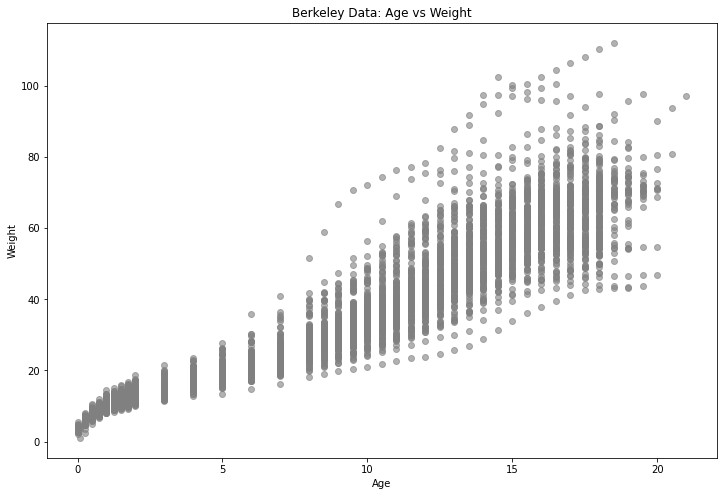

In [3]:
X = data['age'].to_numpy()
y = data['weight'].to_numpy()

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='grey', label='Data', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Berkeley Data: Age vs Weight');

In [4]:
split_points = [2.5, 6, 11, 17]

model = kwPWRidgeRegressor(0.1)
lhs_lt = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.01, lam = 10000, depth_shrink=2)
hs_lt = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.01, lam = 10000, depth_shrink= 0)
lt = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.01, lam = 0, depth_shrink= 0)

In [5]:
model.fit(X, y, split_points)
lhs_lt.fit(X.reshape(-1, 1), y)
hs_lt.fit(X.reshape(-1, 1), y)
lt.fit(X.reshape(-1, 1), y)

(4875, 2) (4875, 1)
(4875, 2) (4875, 1)
(4875, 2) (4875, 1)


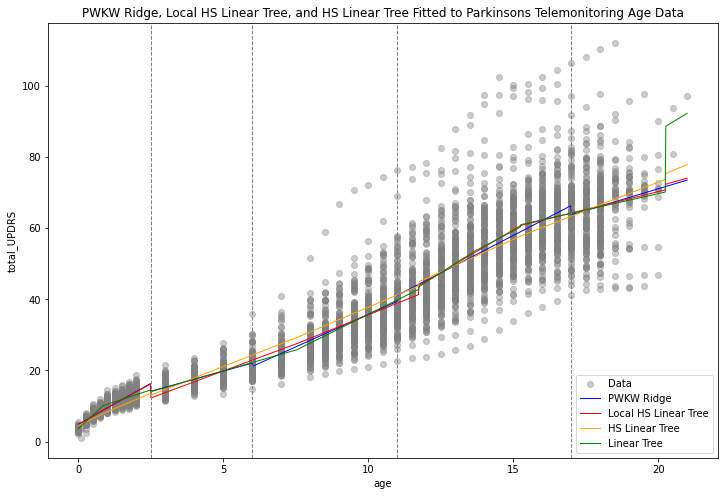

In [6]:
space = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

plt.figure(figsize=(12, 8))

plt.scatter(X, y, color='grey', label='Data', alpha=0.4)

plt.plot(space, model.predict(space.reshape(-1, )), color = 'blue', label='PWKW Ridge', linewidth=1)
plt.plot(space, lhs_lt.predict(space), color = 'red', label='Local HS Linear Tree', linewidth=1)
plt.plot(space, hs_lt.predict(space), color = 'orange', label='HS Linear Tree', linewidth=1)
plt.plot(space, lt.predict(space), color = 'green', label='Linear Tree', linewidth=1)
for split in split_points:
    plt.axvline(x=split, color='grey', linestyle='--', linewidth=1)
plt.xlabel('age')
plt.ylabel('total_UPDRS')
plt.legend()
plt.title('PWKW Ridge, Local HS Linear Tree, and HS Linear Tree Fitted to Parkinsons Telemonitoring Age Data')
plt.savefig('figs/berkeley.png')
plt.show()

In [7]:
#Some Multi-D Performance Below

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [9]:
data = data.dropna(subset=["weight", "age", "height", "stem.length"])

chosen_columns = ["age", "height", "stem.length"]

In [10]:
X_md = data[chosen_columns].to_numpy()
y_md = data['weight'].to_numpy()

In [11]:
X_md.shape

(2898, 3)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_md, y_md, test_size=0.5, random_state=42)

In [13]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1449, 3), (1449, 3), (1449, 1), (1449, 1))

In [35]:
lhs_lt = LinearTree(max_depth = 2, min_r2_gain = 0.1, alpha = 0.01, lam = 1, depth_shrink=1)
hs_lt = LinearTree(max_depth = 2, min_r2_gain = 0.1, alpha = 0.01, lam = 1, depth_shrink=0)
lt = LinearTree(max_depth = 2, min_r2_gain = 0.1, alpha = 0.01, lam = 0, depth_shrink=0)
dt = DecisionTreeRegressor(max_depth = 2)
ridge = Ridge(alpha = 0.01)

In [36]:
lhs_lt.fit(X_train, y_train)
hs_lt.fit(X_train, y_train)
lt.fit(X_train, y_train)
dt.fit(X_train, y_train)
ridge.fit(X_train, y_train)

(1449, 4) (1449, 1)
(1449, 4) (1449, 1)
(1449, 4) (1449, 1)


Ridge(alpha=0.01)

In [38]:
print(f'DT R2: {r2_score(y_test, dt.predict(X_test))}'), 
print(f'Ridge R2: {r2_score(y_test, ridge.predict(X_test))}')
print(f'LT R2: {r2_score(y_test, lt.predict(X_test))}'), 
print(f'HS LT R2: {r2_score(y_test, hs_lt.predict(X_test))}')
print(f'LHS LT R2: {r2_score(y_test, lhs_lt.predict(X_test))}')

DT R2: 0.7279633411721449
Ridge R2: 0.78802320288387
LT R2: 0.7880479549966255
HS LT R2: 0.7880479549966255
LHS LT R2: 0.7880479549966255
